In [1]:
from sympy import *

In [2]:
init_printing()

Рассмотрим уравнение охлаждения тела от температуры $Т_0$ при температуре окружающей среды (атмосферы) $Т_a$
Скорость изменения температуры тела пропорционально разности температуры тела и окружающей среды (закон Ньютона)
$$\frac{dT(t)}{dt} = -k(T(t)-T_a)$$

In [3]:
t, k, T0, Ta = symbols("t, k, T_0, T_a")   # обозначения T_0 как в LaTex

In [4]:
T = Function("T")     # T - просто функция, пока ничему не равна
T

T

Запишем уравнение в виде $f(t) = 0$ и будем его решать.
$$\frac{dT(t)}{dt} + k(T(t)-T_a) = 0$$ 

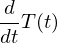

In [5]:
T(t).diff()    # это символьное обозначение первой производной. Если функция от t, то и производная будет по t.

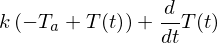

In [6]:
ode = T(t).diff(t) + k*(T(t)-Ta)    # правая часть уравнения f(t) = 0
ode

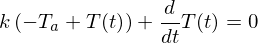

In [7]:
eq = Eq(ode)                        # само уравнение f(t) = 0, его будем решать
eq

sympy.dsolve(уравнение) возвращает решение уравнения в виде уравнения T(t) = ...

In [8]:
ode_sol = dsolve(eq)
ode_sol                            # получили еще одно уравнение, С1 - неизвестно (будем находить потом из граничных условий)

lhs - left-hand side, rhs - right-hand side - левая и правая части уравнений. Это не функции, () не нужно.

In [9]:
ode_sol.lhs

In [10]:
ode_sol.rhs

Сначала (при t=0) температура была $T_0$. Запишем это начальное условие, подставив (subs) в левую и правую части t=0 и начальное условие $T(0) = T_0$

In [11]:
ics = {T(0):T0}                # начальное условие (initial condition) T(0)=T0
ics

In [12]:
lhs0 = ode_sol.lhs.subs(t,0).subs(ics)   # подставим t=0 и начальные условия T(0)=T0 в левую часть 
lhs0

In [13]:
rhs0 = ode_sol.rhs.subs(t,0)            # подставим t=0 в правую часть, T(0)=T0 не подставляем, потому что в правой части T(t) нет
rhs0

Решим уравнение для начальных условий lhs0 = rhs0 относительно C1

In [14]:
C_eq = Eq(lhs0, rhs0)
C_eq

In [15]:
C_sol = solve(C_eq)                     # решаем НЕ дифференциальное уравнение, поэтому solve, а не dsolve
C_sol

Получили список. В списке 1 решение (словарь, dict) - подстановка.

In [16]:
C_sol[0]                               # это подстановка вместо C1 выражения T0-Ta

In [17]:
res = ode_sol.subs(C_sol[0])                 # подставим эту подстановку в полученное решение ОДУ
res

Нарисуем график этой функции, чтобы посмотреть ее поведение.

In [18]:
from sympy.plotting import plot     # чтобы работало в notebook, если хотим отдельным окном, %matplotlib qt

%matplotlib inline                     

In [19]:
expr = res.rhs
expr

Нариуем график функции при Т0=100, k=2, Ta=20 

In [20]:
resn = res.subs({k:1, T0:100, Ta:20})   # эту функцию можно нарисовать
resn

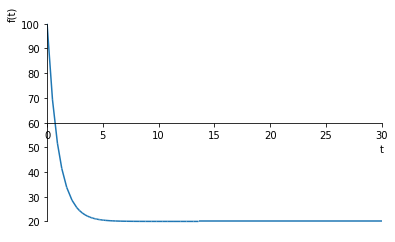

In [21]:
plot(resn.rhs, (t, 0,30))

In [22]:
resn.subs({t:2})
resn

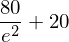

In [23]:
resn.rhs.subs({t:2})

In [24]:
resn.rhs.subs({t:2}).n()